# Redes Neuronales


#### Entrenamiento.

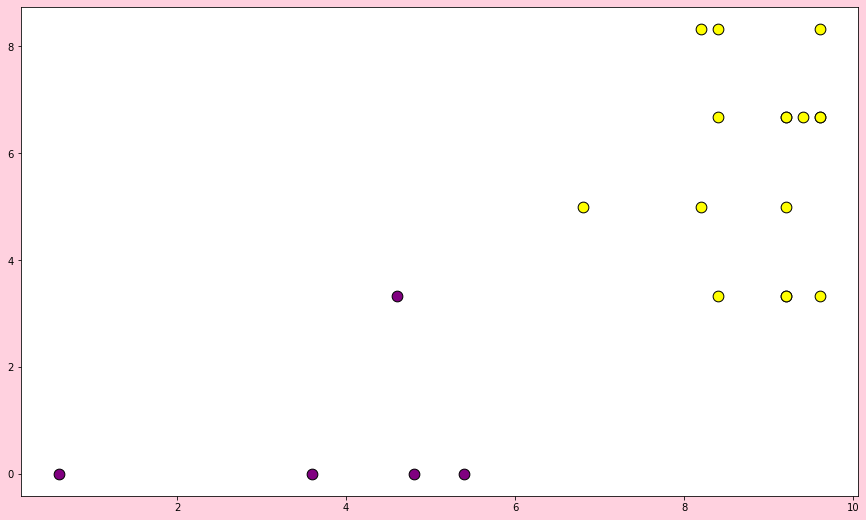

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

#Estilo del gráfico
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 9) #Tamaño del cuadro de gráfico
plt.style.use('fast')

#Cambiar color de afuera de la gráfica
fig = plt.figure()
fig.patch.set_facecolor('xkcd:light pink')

def plot_points(X, y):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]                                       #Personalizar los puntos en la gráfica
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 115, color = 'purple', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 115, color = 'yellow', edgecolor = 'k')

def display(m, b, color='--'): #Personalizar las lineas de entrenamiento
    plt.xlim(-0.5,10)
    plt.ylim(-0.5,10)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)

#Dirección del archivo de datos
df = pd.read_csv('./datosaceptacion.csv',header=None,names=['EjeX','EjeY', 'Tipo'])

X = np.array(df[['EjeX','EjeY']])
y = np.array(df['Tipo'])
plot_points(X,y)
plt.show()


In [126]:
import numpy as np
#Al cambiar "random.seed" cambian las soluciones
np.random.seed(40) #Cambiar para controlar la linea que clasifica

def stepFunction(t):
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

def perceptronStep(X, y, W, b, learn_rate = 0.199):
    # Fill in code
    for i in range(len(X)):
        result_y=prediction(X[i], W, b)
        if y[i]-result_y==1:
            W[0]+=X[i][0]*learn_rate
            W[1]+=X[i][1]*learn_rate
            b+=learn_rate
        if y[i]-result_y==-1:
            W[0]-=X[i][0]*learn_rate
            W[1]-=X[i][1]*learn_rate
            b-=learn_rate
    return W, b

def trainPerceptronAlgorithm(X, y, learn_rate = 0.199, num_epochs = 125): #Cambiar para las líneas de entrenamiento
    x_min, x_max = min(X.T[0]), max(X.T[0])                             #Solo de 25 en 25 muestra líneas de entrenamiento
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    # These are the solution lines that get plotted below.
    boundary_lines = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))

        '''
        Solo para las impresiones de las lineas
        '''
        if i % (num_epochs / 20) == 0:
            display(-W[0]/W[1], -b/W[1])     

    plt.title("CLASIFICACIÓN NOTAS") #Título de la gráfica
    display(-W[0]/W[1], -b/W[1], 'black') #Cambiar color a línea que clasifica
    
    #Para mostrar los datos
    plot_points(X, y)
    plt.show()
        
    return boundary_lines

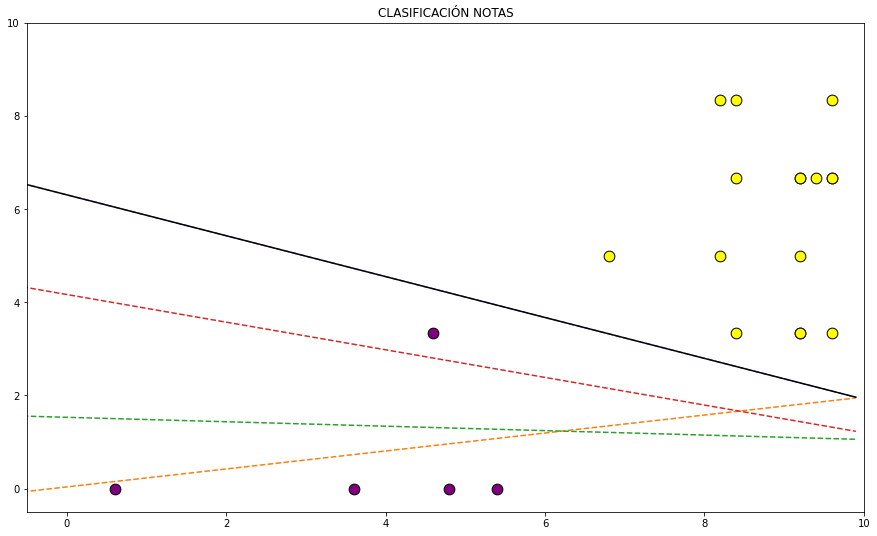

[(array([-0.09335893]), array([-7.08148038])),
 (array([-0.00473609]), array([-4.49530045])),
 (array([0.04051385]), array([-3.17482292])),
 (array([0.0679718]), array([-2.37354868])),
 (array([0.08640726]), array([-1.83556772])),
 (array([0.09963978]), array([-1.44941826])),
 (array([0.28609451]), array([-1.32229003])),
 (array([0.26914408]), array([-1.23753788])),
 (array([0.25219365]), array([-1.15278573])),
 (array([0.23524322]), array([-1.06803358])),
 (array([0.21829279]), array([-0.98328143])),
 (array([0.20134236]), array([-0.89852928])),
 (array([0.18439193]), array([-0.81377713])),
 (array([0.1674415]), array([-0.72902498])),
 (array([0.15049107]), array([-0.64427283])),
 (array([0.13354064]), array([-0.55952068])),
 (array([0.11659021]), array([-0.47476853])),
 (array([0.09963978]), array([-0.39001638])),
 (array([0.08268935]), array([-0.30526423])),
 (array([0.24371843]), array([-0.22051208])),
 (array([0.04878849]), array([-0.22051208])),
 (array([0.20981757]), array([-0.1

In [127]:
trainPerceptronAlgorithm(X,y)


In [52]:
#x = [np.arange(6).reshape(2,3)]
x = [[0 1],
    [2 3],
    [4 5]]
y = [1,1,1,0,0,0]
print (x)
print (y)

SyntaxError: invalid syntax (<ipython-input-52-2b4c0c68a60b>, line 2)

In [27]:
>>> np.argwhere(y==1)

array([[ 1],
       [ 2],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [14],
       [15],
       [16],
       [18],
       [19],
       [20]], dtype=int64)

In [ ]:
print (x[np.argwhere(y==1)])